In [ ]:
import importlib
import utils
importlib.reload(utils)
from utils import extract_pool,model_grps_config
import utils.optim_utils
importlib.reload(utils.optim_utils)
from utils.optim_utils import optim, optim_pool, pt_create_corr_rdm_short
from utils.data_utils import load_obj, SAVE_DIR, UD_PARENT, RESULTS_DIR, LEX_PATH_SET, save_obj
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist, squareform
import matplotlib.cm as cm 
from tqdm import tqdm
import tsnecuda
import seaborn as sns 
import pandas as pd 
import os 
from sklearn.model_selection import LeaveOneOut
ANALYZE_DIR='/om/user/ehoseini/MyData/sent_sampling/analysis/'
from tqdm import tqdm
import tqdm.notebook as tq
from tqdm import tqdm_notebook

In [2]:
mdl_name='gpt2-untrained'
group=f'{mdl_name}_layers'
#group='roberta-base_layers' 
#group='xlnet-large-cased_layers' "
#group='bert-large-uncased-whole-word-masking_layers' "
#group='xlm-mlm-en-2048_layers' "
#group='albert-xxlarge-v2_layers' "
#group='ctrl_layers' "
dataset='ud_sentencez_token_filter_v3' 
activatiion_type='activation' 
average='False' 
extractor_id=f'group={group}-dataset={dataset}-{activatiion_type}-bench=None-ave={average}'
#extractor_id='group=xlm-mlm-en-2048_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False'
test=extract_pool[extractor_id]() 
model_layers=test.layer_name 
test.load_dataset() 
test()


extractor_obj = extract_pool[extractor_id]()
extractor_obj.load_dataset()
model_layers = extractor_obj.layer_name
extractor_obj()
mdl_name=str(np.unique(extractor_obj.model_spec).squeeze())

loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentencez_data_token_filter_v3_no_dup.pkl


934it [00:00, 257474.86it/s]
934it [00:00, 242763.83it/s]
935it [00:00, 240357.58it/s]
934it [00:00, 240439.45it/s]
934it [00:00, 236906.14it/s]
935it [00:00, 235932.75it/s]
934it [00:00, 242508.35it/s]
934it [00:00, 233127.82it/s]
935it [00:00, 237821.36it/s]


extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untrained_layer_0_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_gpt2-untrained_layer_0_activation_ave_False.pkl
adding activations to set
extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untrained_layer_1_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_gpt2-untrained_layer_1_activation_ave_False.pkl
adding activations to set
extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untrained_layer_2_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_gpt2-untrained_layer_2_activation_ave_False.pkl
adding activations to set
extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untr

934it [00:00, 227535.57it/s]
934it [00:00, 225414.58it/s]
935it [00:00, 240136.81it/s]
934it [00:00, 215471.09it/s]
934it [00:00, 228251.47it/s]
935it [00:00, 234676.22it/s]
934it [00:00, 240823.75it/s]
934it [00:00, 239850.61it/s]
935it [00:00, 235437.01it/s]


extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untrained_layer_0_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_gpt2-untrained_layer_0_activation_ave_False.pkl
adding activations to set
extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untrained_layer_1_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_gpt2-untrained_layer_1_activation_ave_False.pkl
adding activations to set
extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untrained_layer_2_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_gpt2-untrained_layer_2_activation_ave_False.pkl
adding activations to set
extracting network activations for gpt2-untrained
ud_sentencez_token_filter_v3_gpt2-untr

In [3]:
optimizer_id='coordinate_ascent_eh-obj=D_s_var-n_iter=50-n_samples=25-n_init=1-run_gpu=True'
optim_obj=optim_pool[optimizer_id]()
optim_obj.load_extractor(test)
del test


optimizer_obj = optim_pool[optimizer_id]()
optimizer_obj.load_extractor(extractor_obj)
del extractor_obj

In [6]:
layer_id_list=[x['layer'] for x in optim_obj.activations]

In [36]:
scores = pd.read_csv(os.path.join(SAVE_DIR, 'scoresscoresscores', 'scores-Pereira2018-encoding-normalized.csv'))
score_layer = list(scores['layer'][scores['model'] == mdl_name])
score_benchmark = list(scores['benchmark'][scores['model'] == mdl_name])
score_score = np.asarray(scores['score'][scores['model'] == mdl_name])
score_error = np.asarray(scores['error'][scores['model'] == mdl_name])

In [37]:
model_classes=['glove','ETM','word2vec','lm_1b','skip-thoughts','bert-','roberta','xlm','xlm-roberta-'
    ,'transfo-xl','xlnet','ctrl','t5','albert-','gpt']
color_groups=['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
  'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [38]:
color_ids=[]
model_set=scores['model'].unique()
model_perf=[]
model_perf_untrained=[]
model_names=[]
model_layer_ids=[]
for model_id in model_set:
    model_score=scores['score'][scores['model']==model_id]
    model_error=scores['error'][scores['model']==model_id]
    model_layer_=scores['layer'][scores['model']==model_id]
    if model_id.find('untrained')==-1:
        model_perf.append([model_score.max(),model_error[model_score.idxmax()]])
        model_names.append(f"{model_id} ({model_layer_[model_score.idxmax()]})")
        model_layer_ids.append(model_layer_)
        # get untrained score 
        model_score_untr=list(scores['score'][scores['model']==f"{model_id}-untrained"])
        model_error_untr=list(scores['error'][scores['model']==f"{model_id}-untrained"])  
        model_perf_untrained.append([model_score_untr[np.argmax(model_score)],model_error_untr[np.argmax(model_score)]])


        if model_id=='xlm-roberta-base' or model_id=='xlm-roberta-large':
                color_loc=8
        else:
                color_loc=int(np.argwhere([model_id.find(x)!=-1  for x in model_classes])[-1].squeeze())
        color_ids.append(color_loc)


In [39]:
num_cols=[len(np.where(np.asarray(color_ids)==x)[0]) for idx, x in enumerate(np.unique(color_ids))]
h0s=[cm.get_cmap(color_groups[x],num_cols[idx]+2) for idx, x in enumerate(np.unique(color_ids))]
all_colors=[np.flipud(x(np.arange(num_cols[idx])/(num_cols[idx]+1))) for idx, x in enumerate(h0s)]
    #all_colors=[x(np.arange(num_cols[idx])/(num_cols[idx]+1)) for idx, x in enumerate(h0s)],
all_colors = [item for sublist in all_colors for item in sublist]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

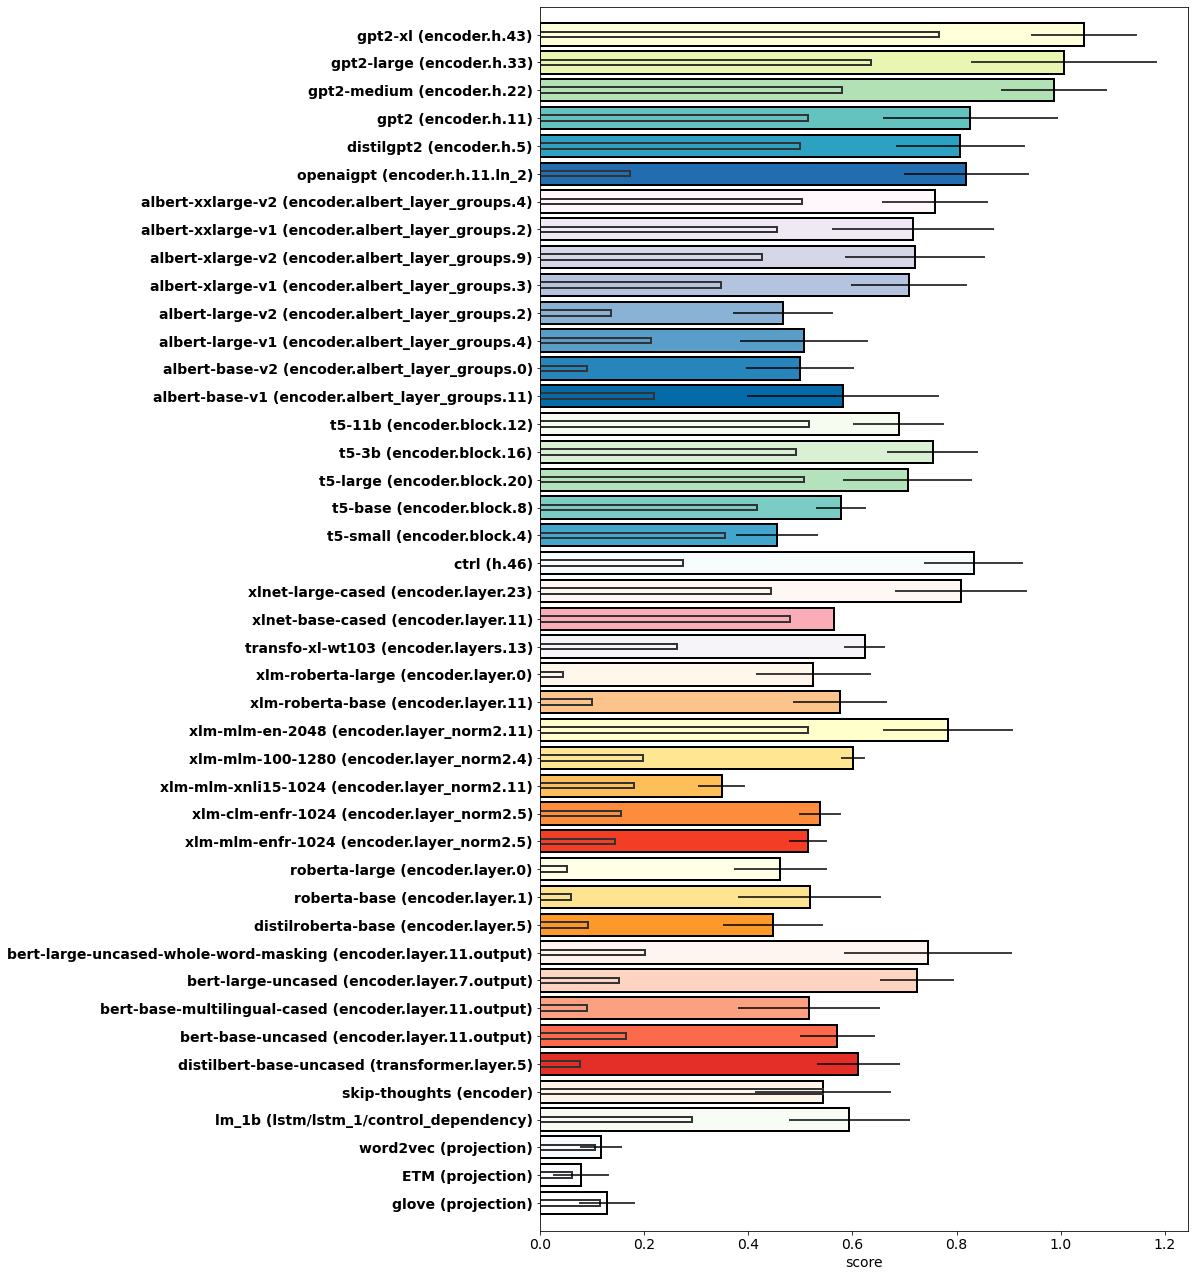

In [40]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.1,.6,.85))
ax.barh(y_pos, np.asarray(model_perf)[:,0], xerr=np.asarray(model_perf)[:,1], align='center',color=np.asarray(all_colors),edgecolor=(0,0,0),linewidth=2)
ax.barh(y_pos, np.asarray(model_perf_untrained)[:,0],height=0.2, align='center',color=np.asarray(all_colors),edgecolor=(.2,.2,.2),linewidth=2)
ax.set_yticks(y_pos)
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names,fontsize=14,fontweight='bold')
ax.set_xlabel('score',fontsize=14)
plt.xticks(fontsize=14)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

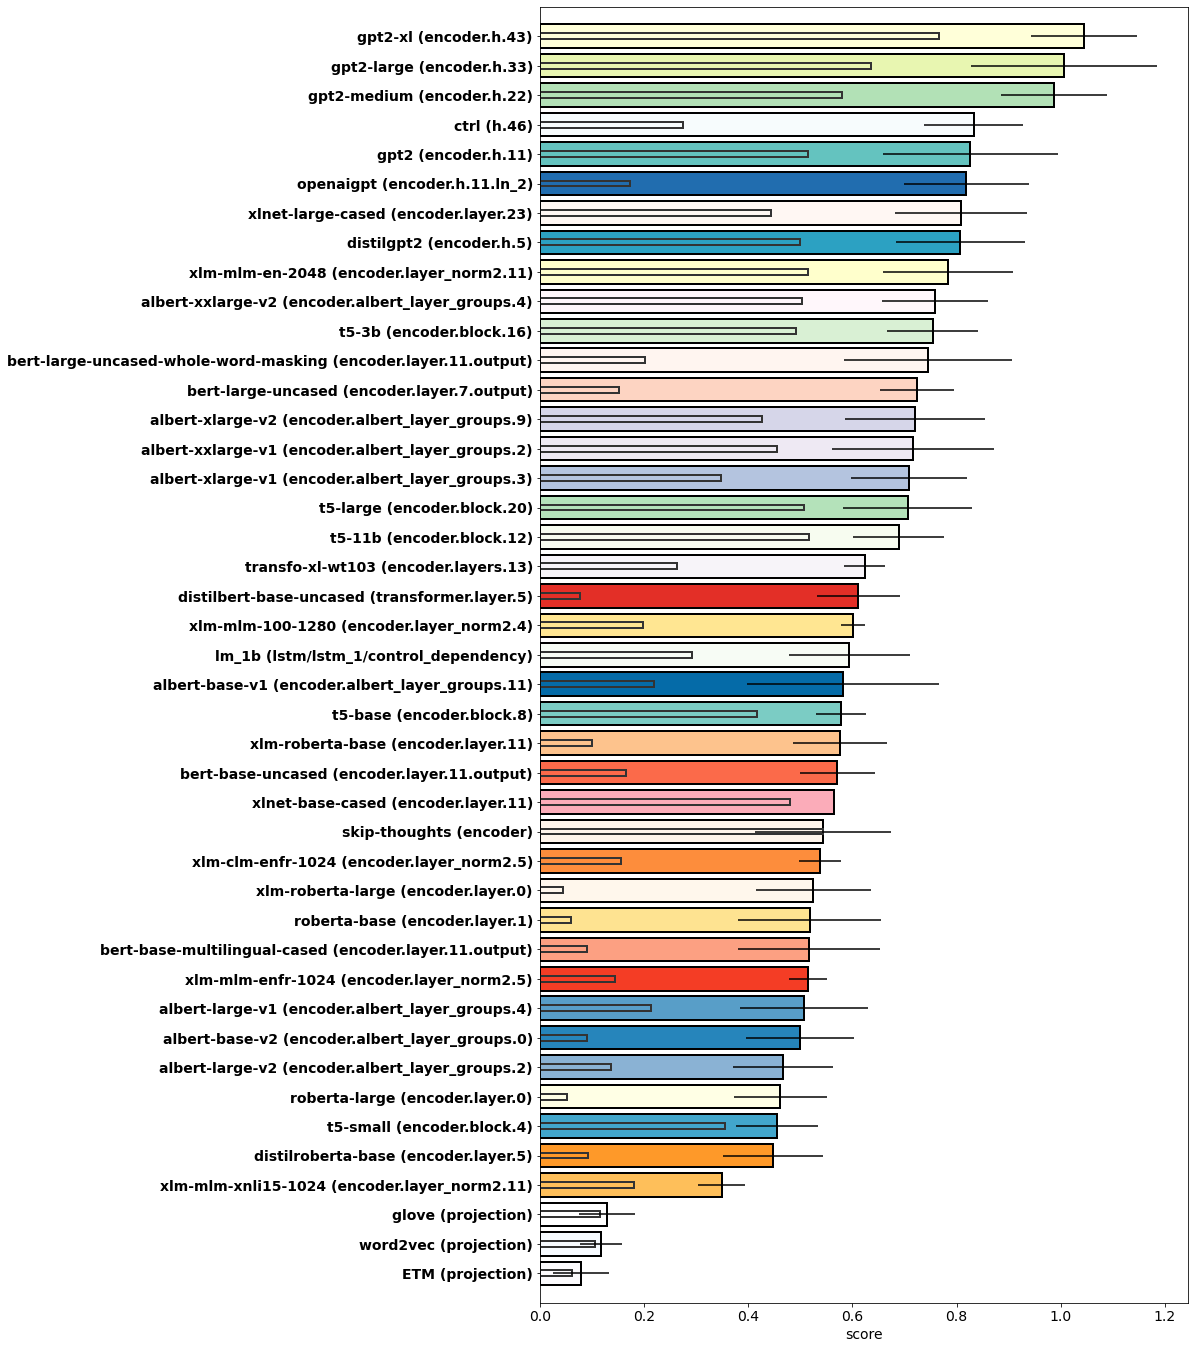

In [41]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
new_order=np.argsort(np.asarray(model_perf)[:,0])
ax.barh(y_pos, np.asarray(model_perf)[new_order,0], xerr=np.asarray(model_perf)[new_order,1], align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
ax.barh(y_pos, np.asarray(model_perf_untrained)[new_order,0],height=0.2, align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(.2,.2,.2),linewidth=2)
ax.set_yticks(y_pos)
model_names_order=[model_names[x] for x in new_order]
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names_order,fontsize=14,fontweight='bold')
ax.set_xlabel('score',fontsize=14)
plt.xticks(fontsize=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

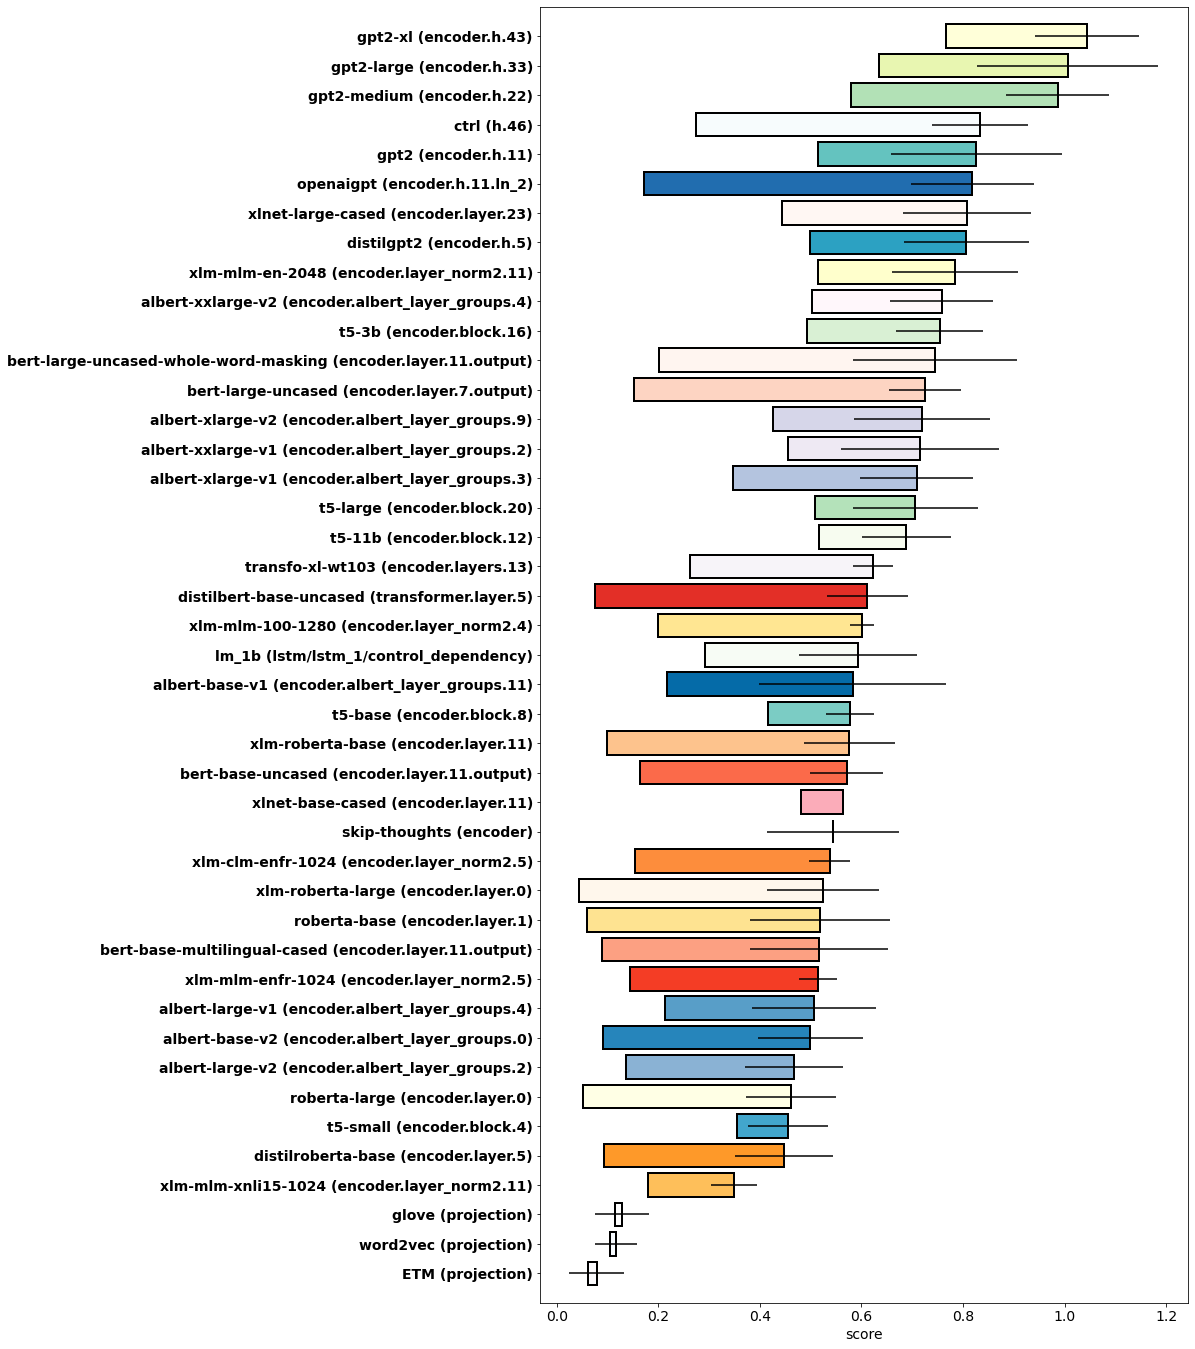

In [42]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
new_order=np.argsort(np.asarray(model_perf)[:,0])
baselines=np.asarray(model_perf_untrained)[new_order,0]
ax.barh(y_pos, np.asarray(model_perf)[new_order,0]-baselines,left=baselines, xerr=np.asarray(model_perf)[new_order,1], align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
#ax.barh(y_pos, np.asarray(model_perf_untrained)[new_order,0],height=0.8, align='center',color=(1,1,1),edgecolor=(1,1,1),linewidth=2)
ax.set_yticks(y_pos)
model_names_order=[model_names[x] for x in new_order]
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names_order,fontsize=14,fontweight='bold')
ax.set_xlabel('score',fontsize=14)
plt.xticks(fontsize=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

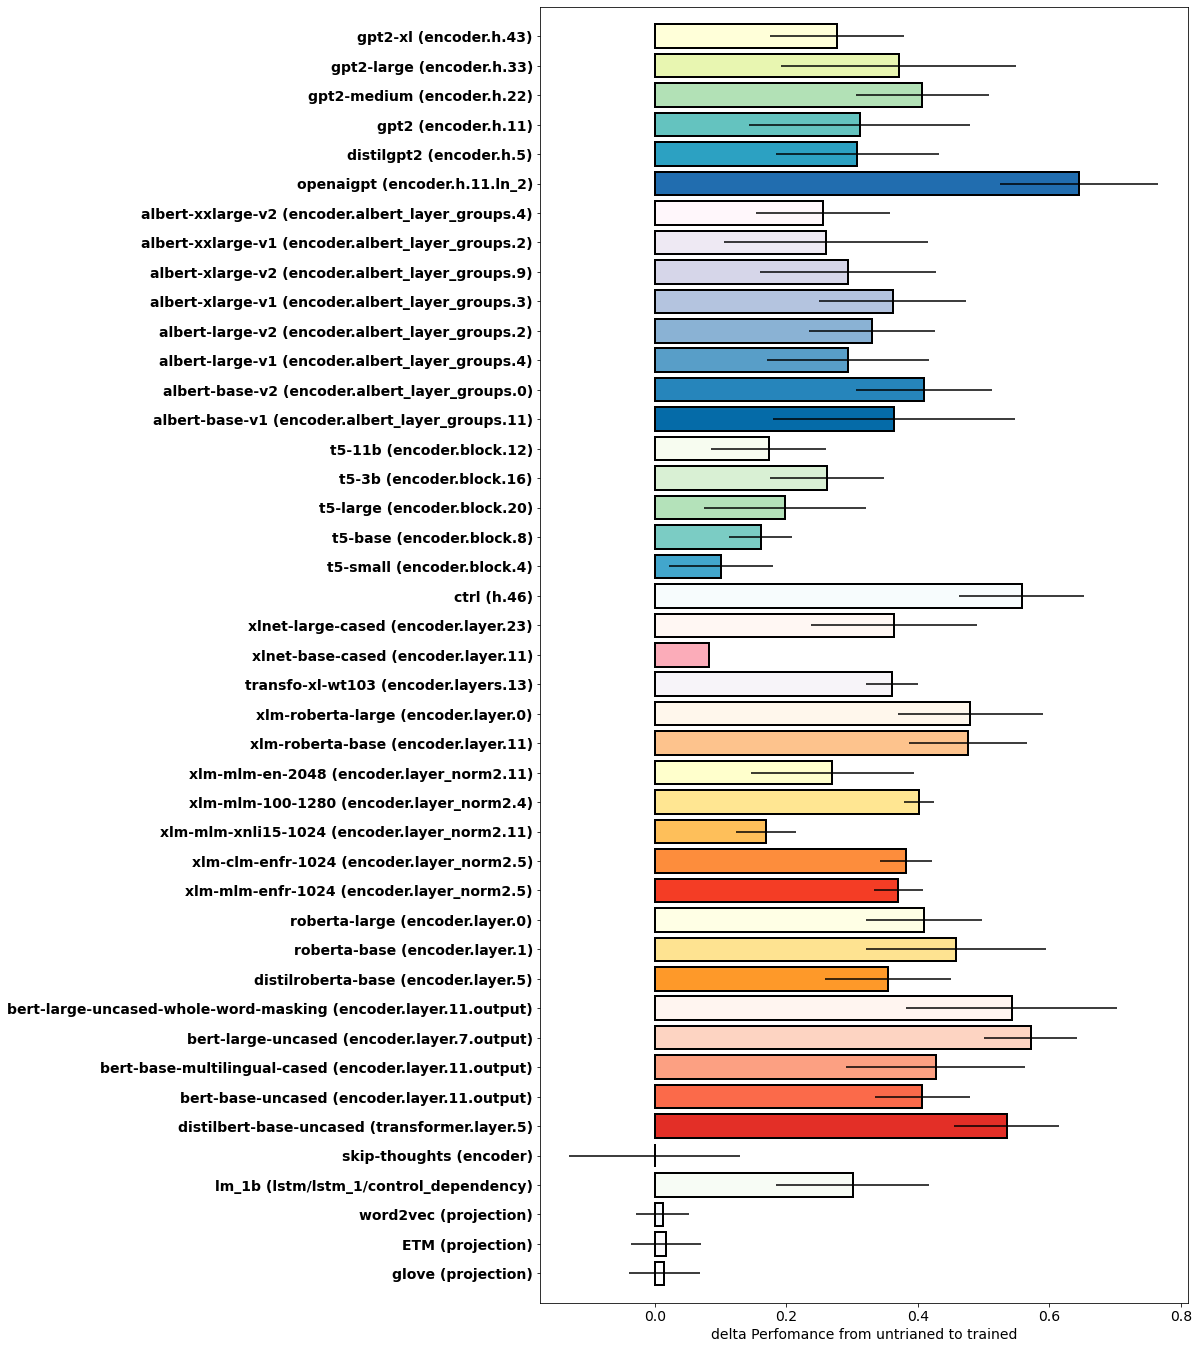

In [43]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
ax.barh(y_pos, np.asarray(model_perf)[:,0]-np.asarray(model_perf_untrained)[:,0], xerr=np.asarray(model_perf)[:,1], align='center',color=np.asarray(all_colors),edgecolor=(0,0,0),linewidth=2)
#ax.barh(y_pos, np.asarray(model_perf_untrained)[:,0],height=0.2, align='center',color=np.asarray(all_colors),edgecolor=(.2,.2,.2),linewidth=2)
ax.set_yticks(y_pos)
ax.set_yticklabels(model_names,fontsize=12,fontweight='bold')
ax.set_xlabel('delta Perfomance from untrianed to trained',fontsize=14)

ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names,fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

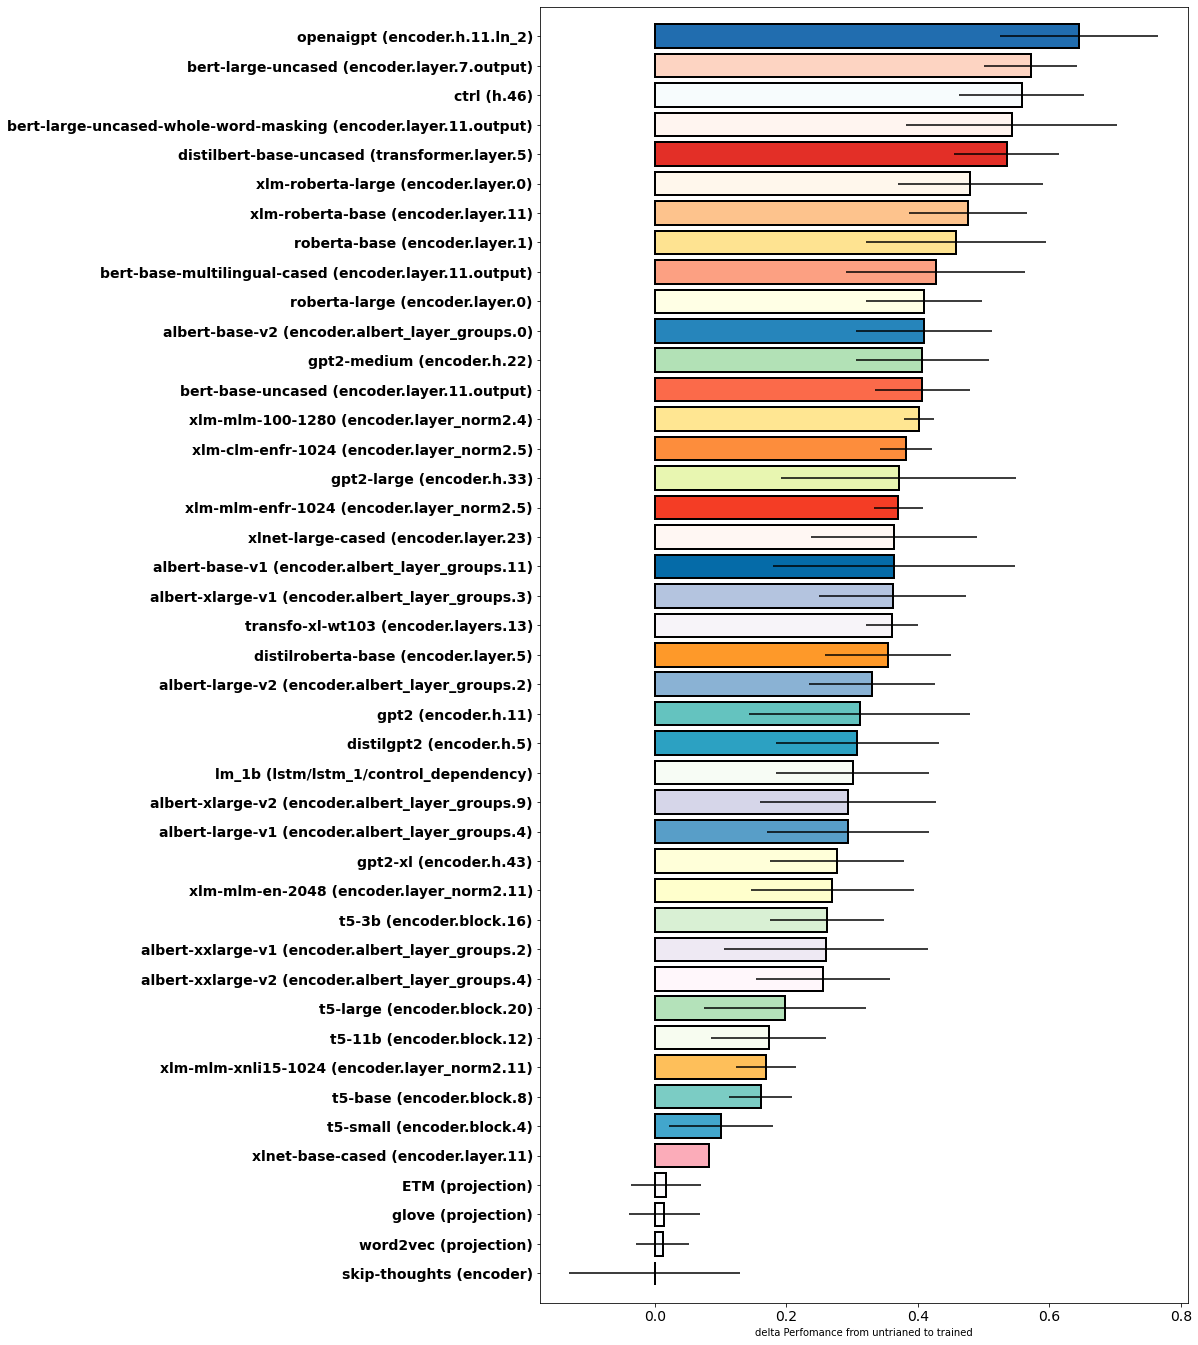

In [44]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
perf_diff=np.asarray(model_perf)[:,0]-np.asarray(model_perf_untrained)[:,0]
new_order=np.argsort(perf_diff)
ax.barh(y_pos, perf_diff[new_order], xerr=np.asarray(model_perf)[new_order,1], align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
model_names_order=[model_names[x] for x in new_order]
ax.set_yticks(y_pos)

ax.set_xlabel('delta Perfomance from untrianed to trained')

ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names_order,fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

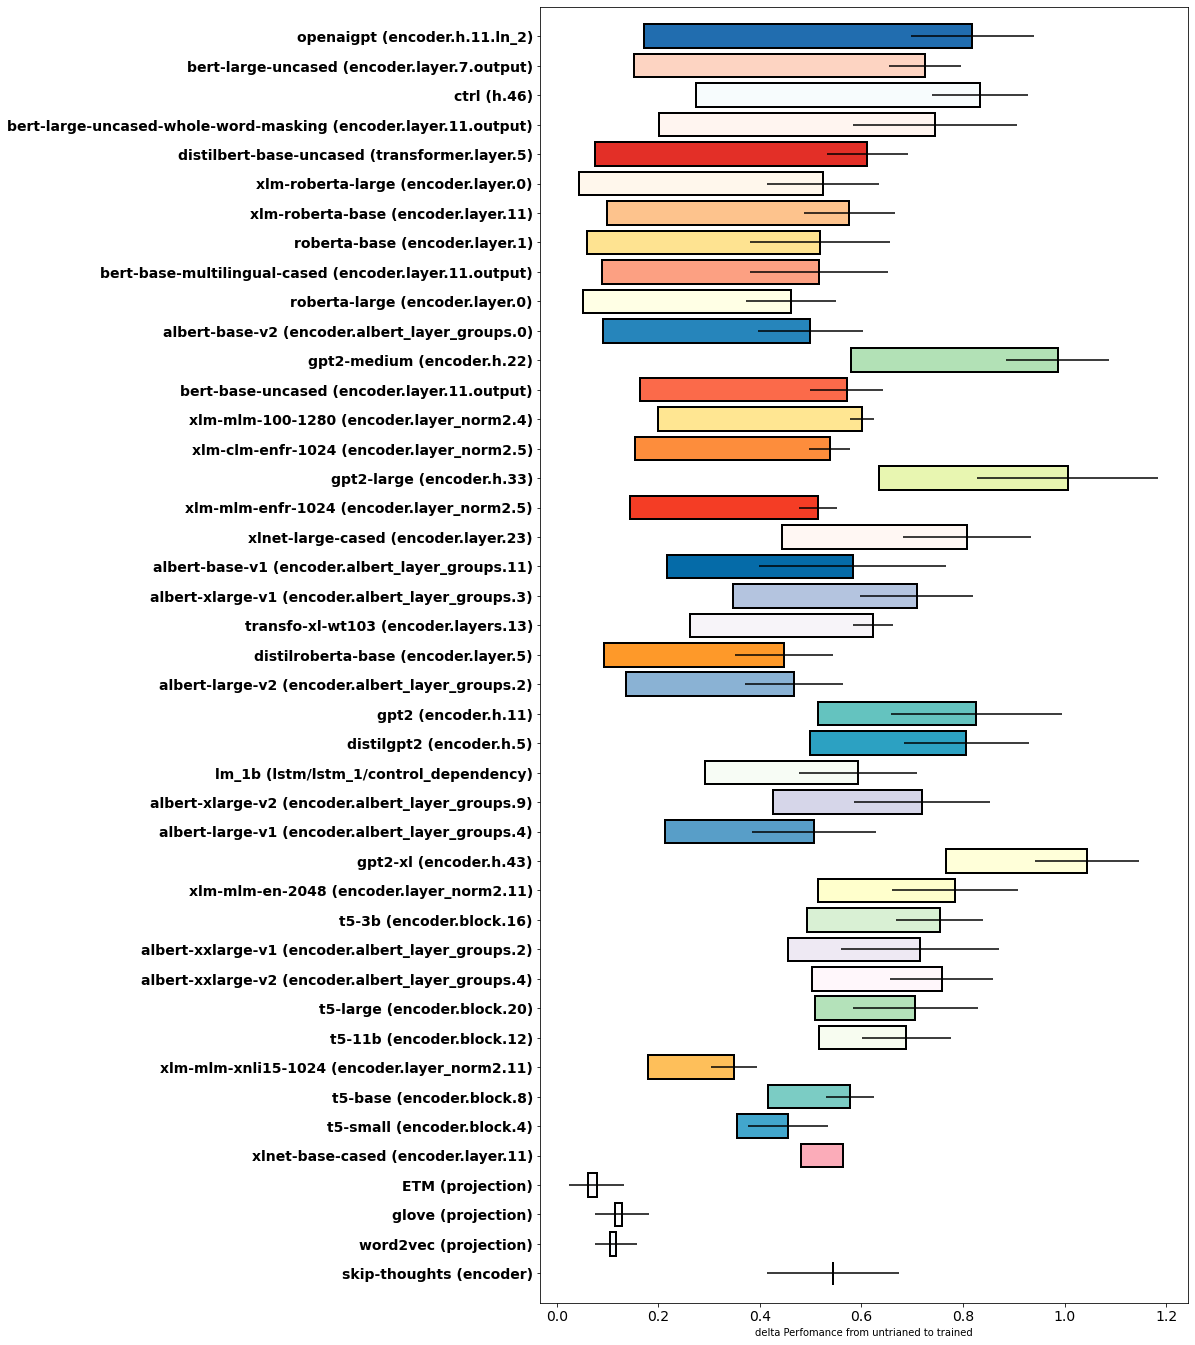

In [45]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
perf_diff=np.asarray(model_perf)[:,0]-np.asarray(model_perf_untrained)[:,0]
new_order=np.argsort(perf_diff)
baseline_perf=np.asarray(model_perf_untrained)[:,0]
ax.barh(y_pos, perf_diff[new_order], xerr=np.asarray(model_perf)[new_order,1],left=baseline_perf[new_order],align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
model_names_order=[model_names[x] for x in new_order]
ax.set_yticks(y_pos)

ax.set_xlabel('delta Perfomance from untrianed to trained')

ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names_order,fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


(array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(-1.0, 0, '1.0'),
  Text(-0.8, 0, '0.8'),
  Text(-0.6, 0, '0.6'),
  Text(-0.3999999999999999, 0, '0.4'),
  Text(-0.19999999999999996, 0, '0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.20000000000000018, 0, '0.2'),
  Text(0.40000000000000013, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

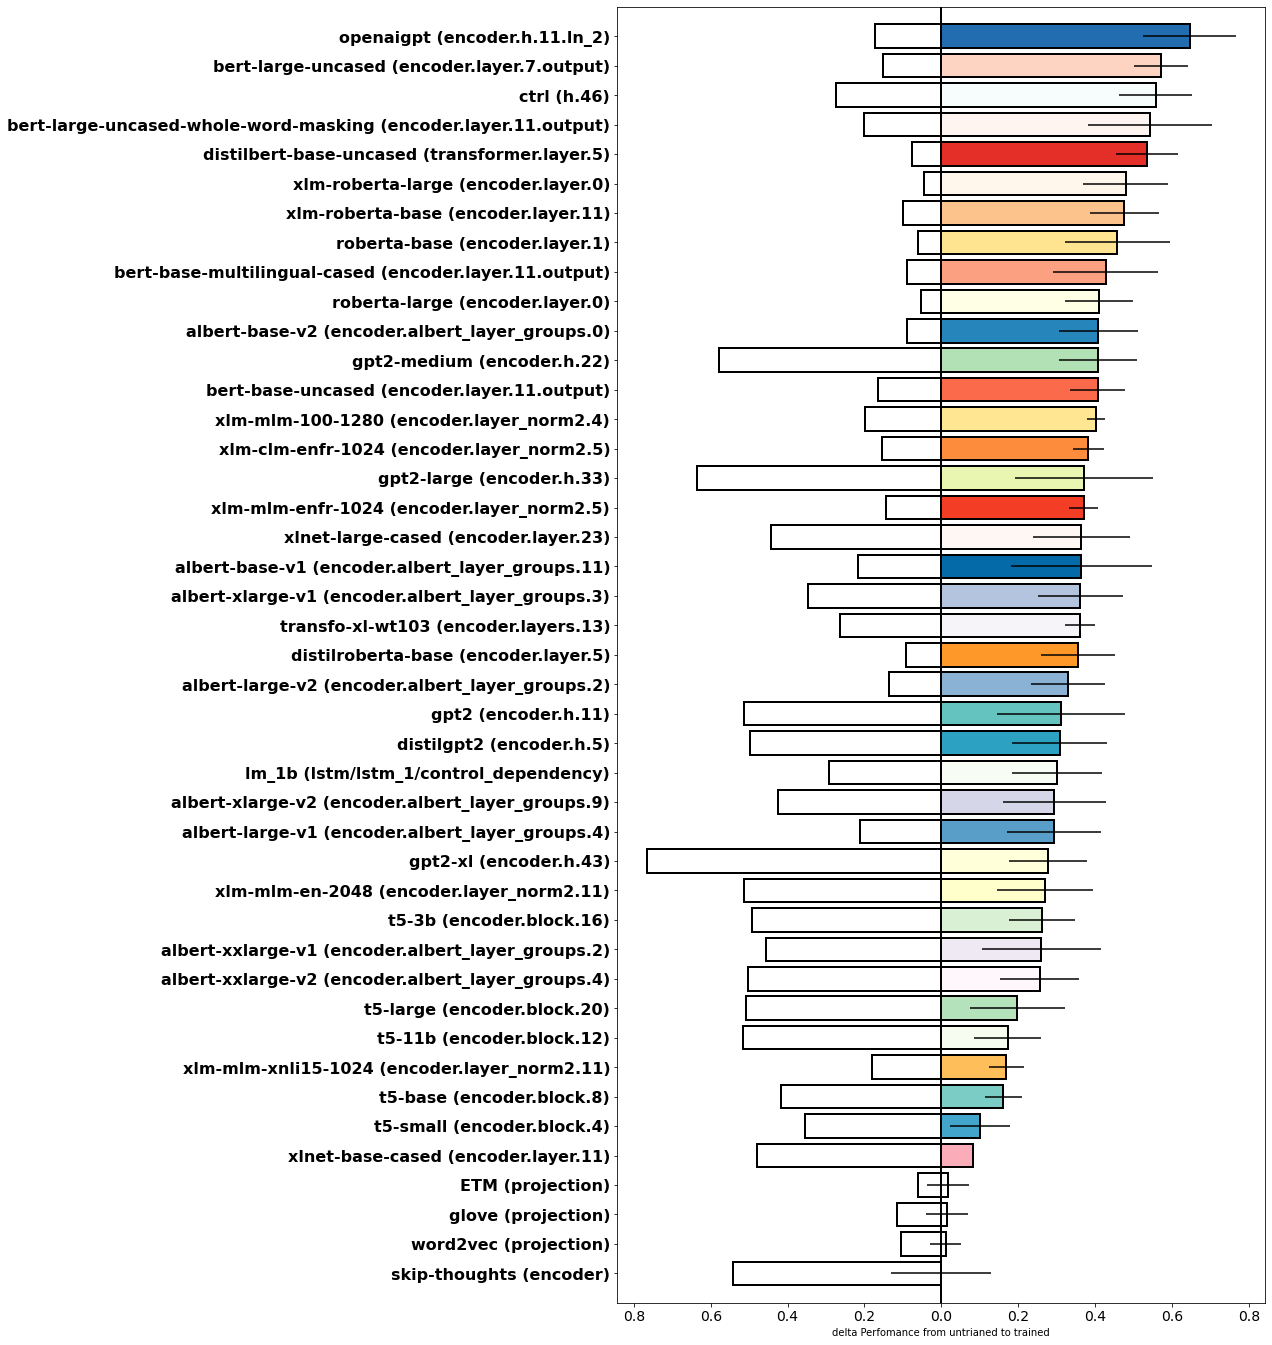

In [46]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
perf_diff=np.asarray(model_perf)[:,0]-np.asarray(model_perf_untrained)[:,0]
new_order=np.argsort(perf_diff)
baseline_perf=np.asarray(model_perf_untrained)[:,0]
ax.barh(y_pos, perf_diff[new_order], xerr=np.asarray(model_perf)[new_order,1],align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
ax.barh(y_pos, -1*baseline_perf[new_order],align='center',color=(1,1,1),edgecolor=(0,0,0),linewidth=2),
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.plot([0,0],[y_pos.min()-1,y_pos.max()+1],'k-',linewidth=2)

model_names_order=[model_names[x] for x in new_order]
ax.set_yticks(y_pos)
labels = ["{0:.1f}".format(x) for x in np.abs(ax.get_xticks())]
ax.set_xticklabels(labels)
ax.set_xlabel('delta Perfomance from untrianed to trained')


ax.set_yticklabels(model_names_order,fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)

In [18]:
labels = ["{0:.1f}".format(x) for x in np.abs(ax.get_xticks())]


## behavioral scores 

In [47]:
scores = pd.read_csv(os.path.join(SAVE_DIR, 'scoresscoresscores', 'scores-Futrell2018-encoding-normalized.csv'))
score_layer = list(scores['layer'][scores['model'] == mdl_name])
score_benchmark = list(scores['benchmark'][scores['model'] == mdl_name])
score_score = np.asarray(scores['score'][scores['model'] == mdl_name])
score_error = np.asarray(scores['error'][scores['model'] == mdl_name])

In [48]:
model_classes=['glove','ETM','word2vec','lm_1b','skip-thoughts','bert-','roberta','xlm','xlm-roberta-'
    ,'transfo-xl','xlnet','ctrl','t5','albert-','gpt','transformer']
color_groups=['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
  'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [49]:
color_ids=[]
model_set=scores['model'].unique()
model_perf=[]
model_perf_untrained=[]
model_names=[]
model_layer_ids=[]
for model_id in model_set:
    model_score=scores['score'][scores['model']==model_id]
    model_error=scores['error'][scores['model']==model_id]
    model_layer_=scores['layer'][scores['model']==model_id]
    if model_id.find('untrained')==-1:
        model_perf.append([model_score.max(),model_error[model_score.idxmax()]])
        model_names.append(f"{model_id} ({model_layer_[model_score.idxmax()]})")
        model_layer_ids.append(model_layer_)
        # get untrained score 
        model_score_untr=list(scores['score'][scores['model']==f"{model_id}-untrained"])
        model_error_untr=list(scores['error'][scores['model']==f"{model_id}-untrained"])  
        model_perf_untrained.append([model_score_untr[np.argmax(model_score)],model_error_untr[np.argmax(model_score)]])


        if model_id=='xlm-roberta-base' or model_id=='xlm-roberta-large':
                color_loc=8
        else:
                color_loc=int(np.argwhere([model_id.find(x)!=-1  for x in model_classes])[-1].squeeze())
        color_ids.append(color_loc)

In [50]:
num_cols=[len(np.where(np.asarray(color_ids)==x)[0]) for idx, x in enumerate(np.unique(color_ids))]
h0s=[cm.get_cmap(color_groups[x],num_cols[idx]+2) for idx, x in enumerate(np.unique(color_ids))]
all_colors=[np.flipud(x(np.arange(num_cols[idx])/(num_cols[idx]+1))) for idx, x in enumerate(h0s)]
    #all_colors=[x(np.arange(num_cols[idx])/(num_cols[idx]+1)) for idx, x in enumerate(h0s)],
all_colors = [item for sublist in all_colors for item in sublist]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

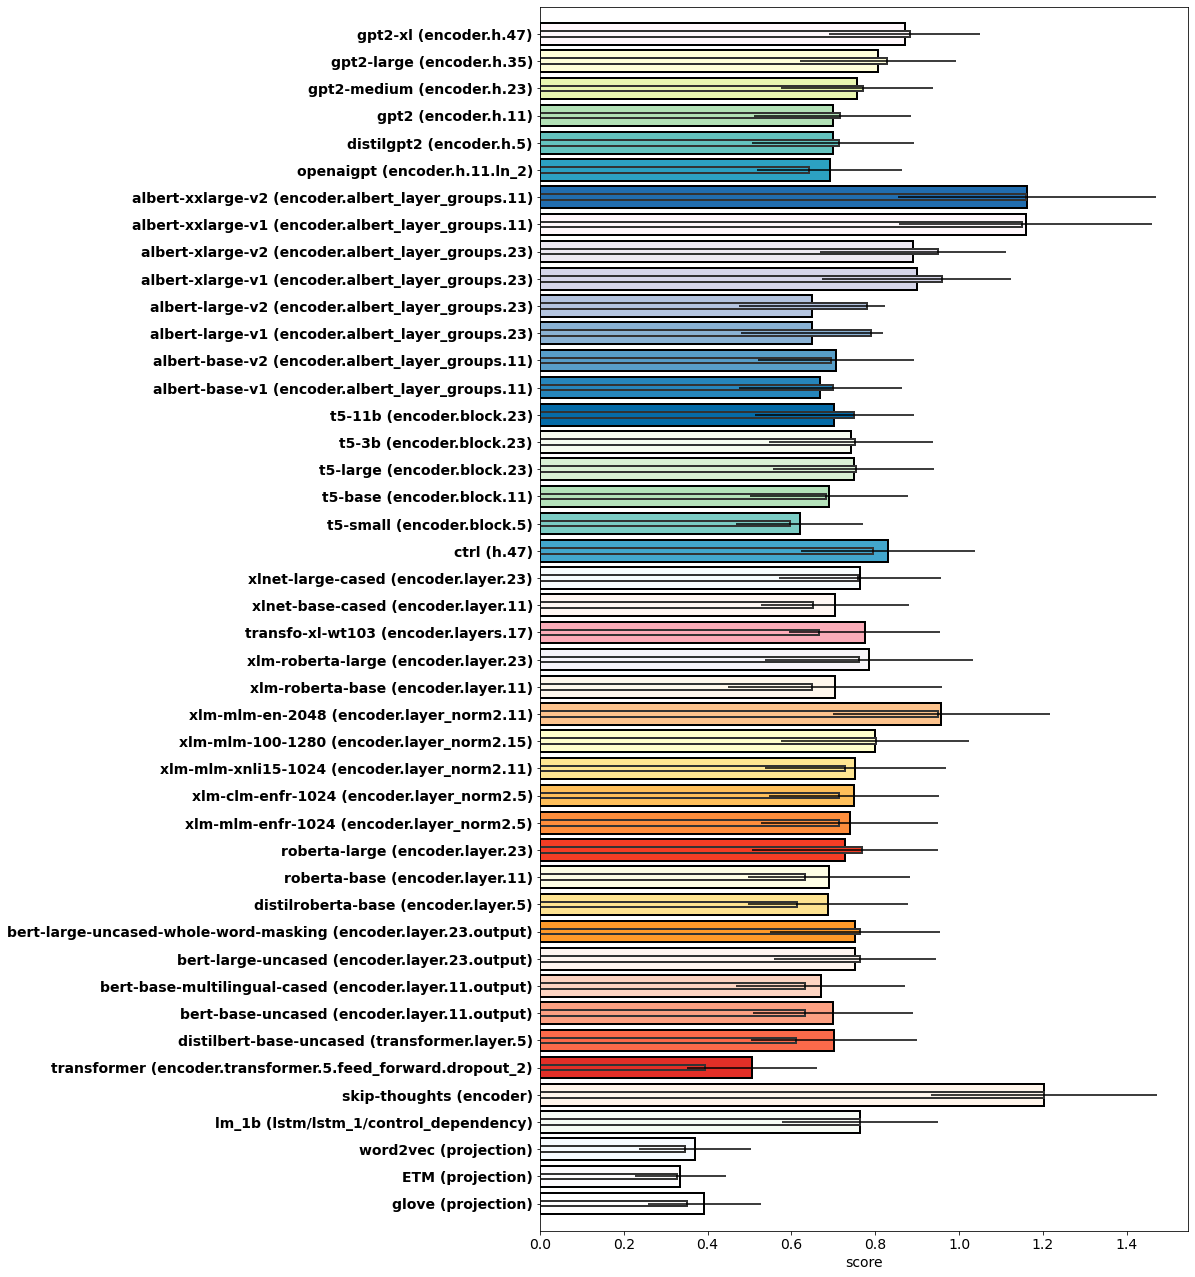

In [51]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.1,.6,.85))
ax.barh(y_pos, np.asarray(model_perf)[:,0], xerr=np.asarray(model_perf)[:,1], align='center',color=np.asarray(all_colors),edgecolor=(0,0,0),linewidth=2)
ax.barh(y_pos, np.asarray(model_perf_untrained)[:,0],height=0.2, align='center',color=np.asarray(all_colors),edgecolor=(.2,.2,.2),linewidth=2)
ax.set_yticks(y_pos)
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names,fontsize=14,fontweight='bold')
ax.set_xlabel('score',fontsize=14)
plt.xticks(fontsize=14)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

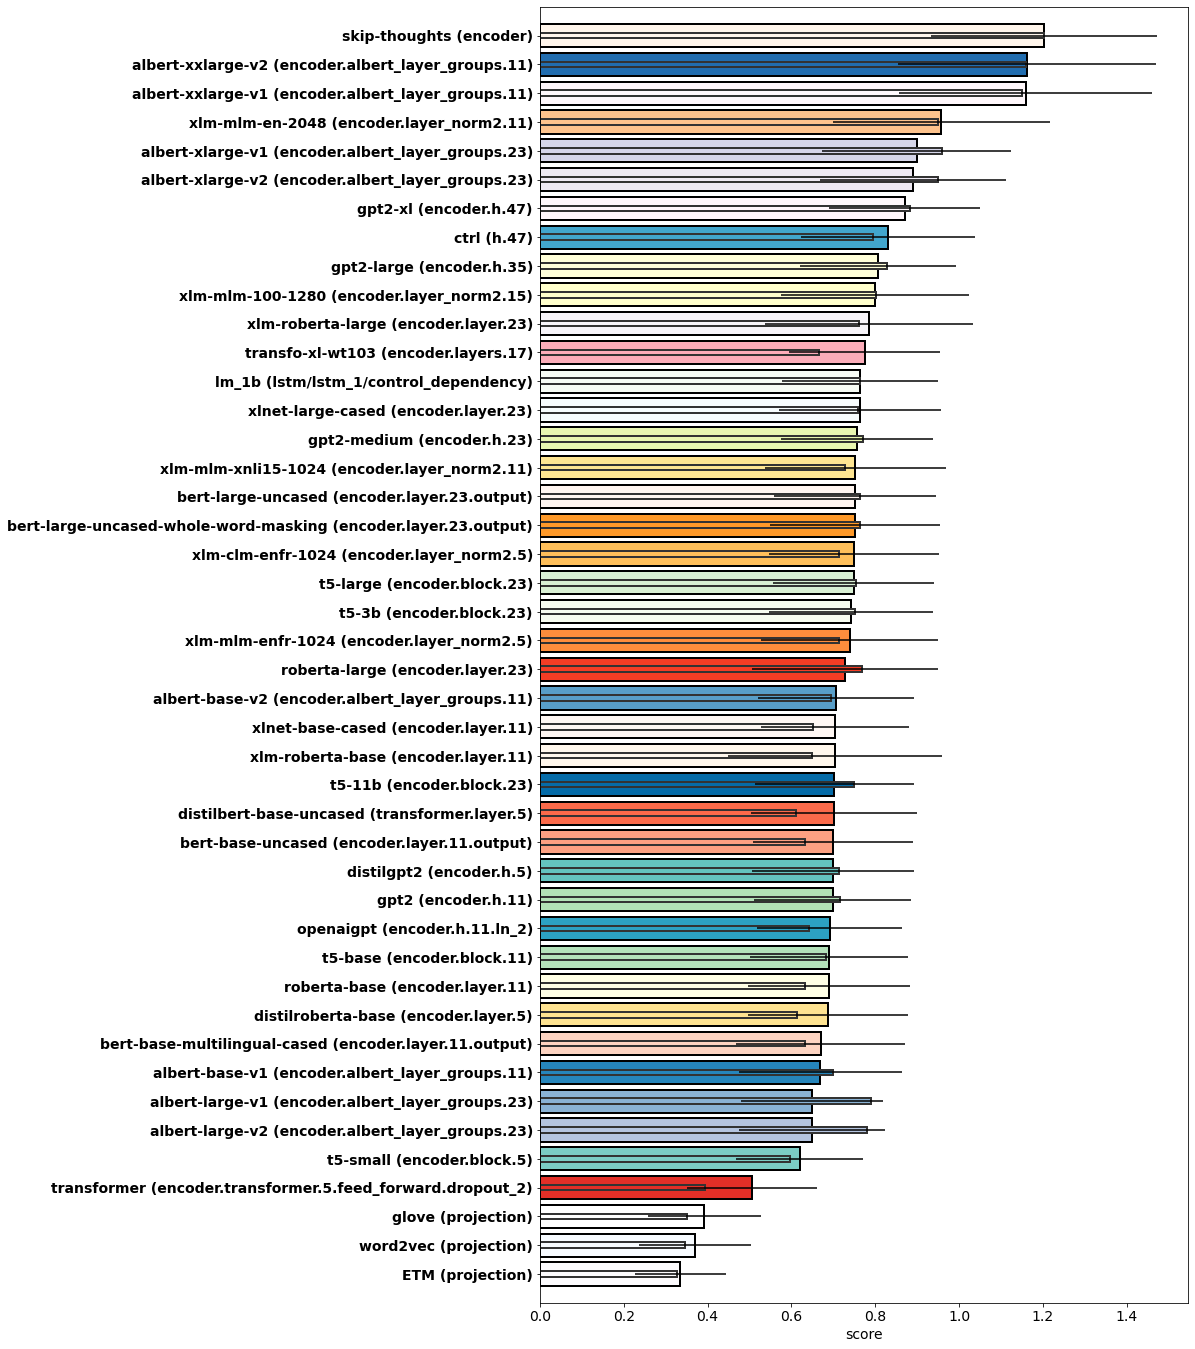

In [52]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
new_order=np.argsort(np.asarray(model_perf)[:,0])
ax.barh(y_pos, np.asarray(model_perf)[new_order,0], xerr=np.asarray(model_perf)[new_order,1], align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
ax.barh(y_pos, np.asarray(model_perf_untrained)[new_order,0],height=0.2, align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(.2,.2,.2),linewidth=2)
ax.set_yticks(y_pos)
model_names_order=[model_names[x] for x in new_order]
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names_order,fontsize=14,fontweight='bold')
ax.set_xlabel('score',fontsize=14)
plt.xticks(fontsize=14)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

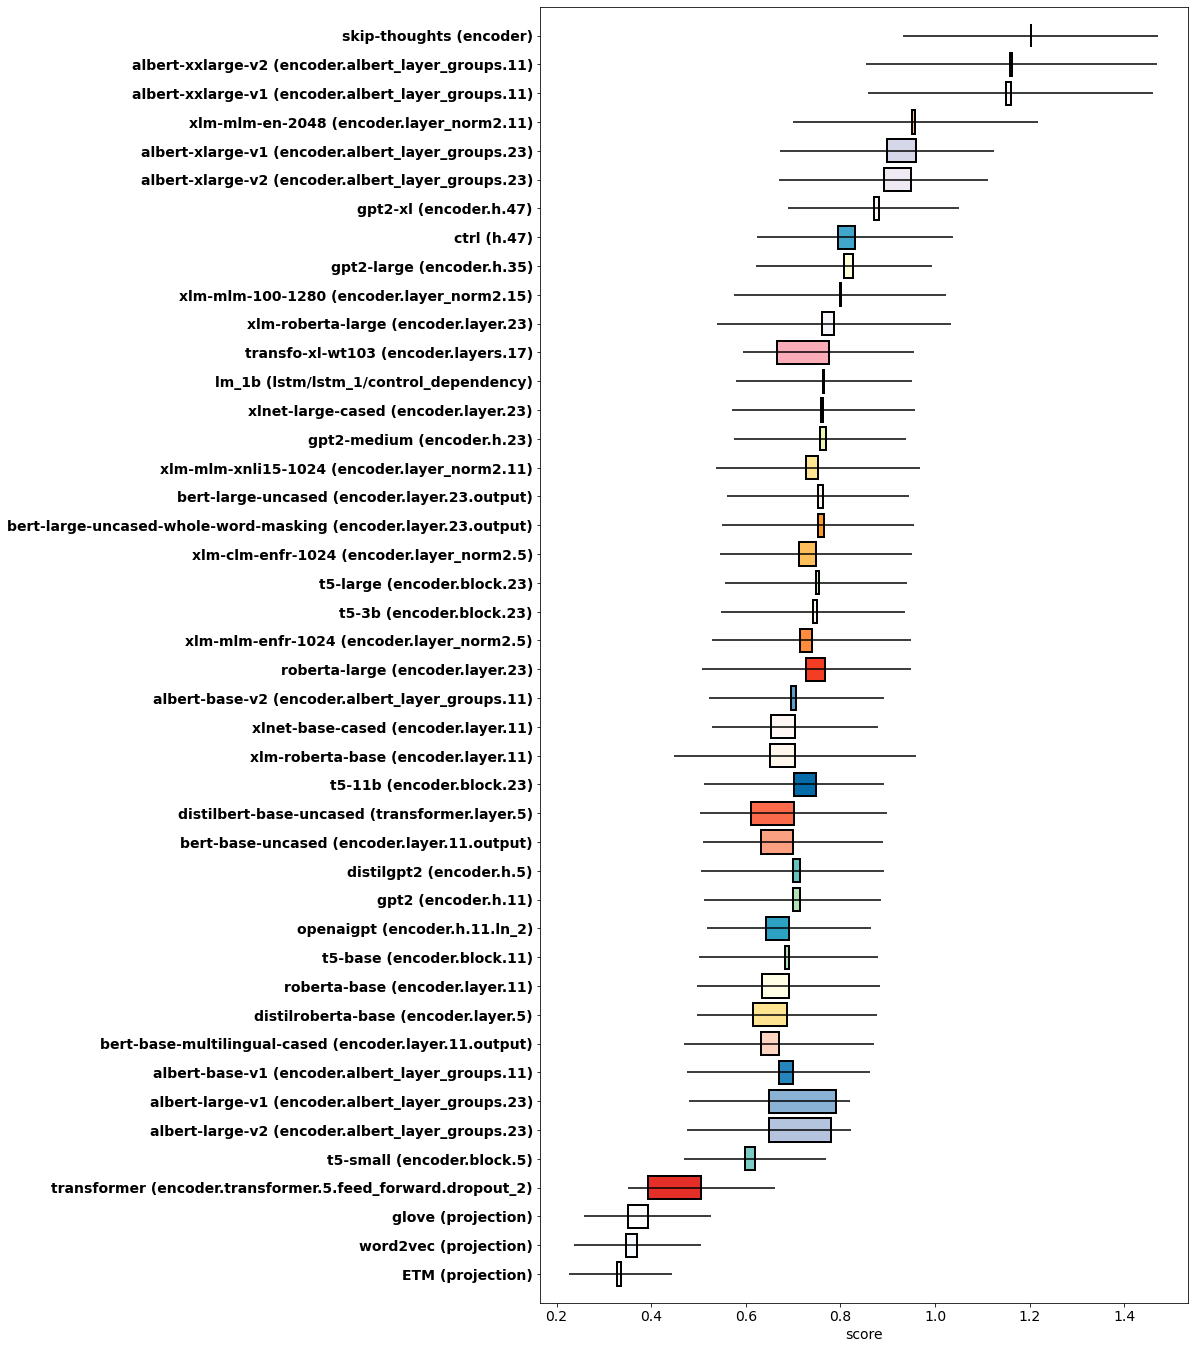

In [53]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
new_order=np.argsort(np.asarray(model_perf)[:,0])
baselines=np.asarray(model_perf_untrained)[new_order,0]
ax.barh(y_pos, np.asarray(model_perf)[new_order,0]-baselines,left=baselines, xerr=np.asarray(model_perf)[new_order,1], align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
#ax.barh(y_pos, np.asarray(model_perf_untrained)[new_order,0],height=0.8, align='center',color=(1,1,1),edgecolor=(1,1,1),linewidth=2)
ax.set_yticks(y_pos)
model_names_order=[model_names[x] for x in new_order]
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names_order,fontsize=14,fontweight='bold')
ax.set_xlabel('score',fontsize=14)
plt.xticks(fontsize=14)

(array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

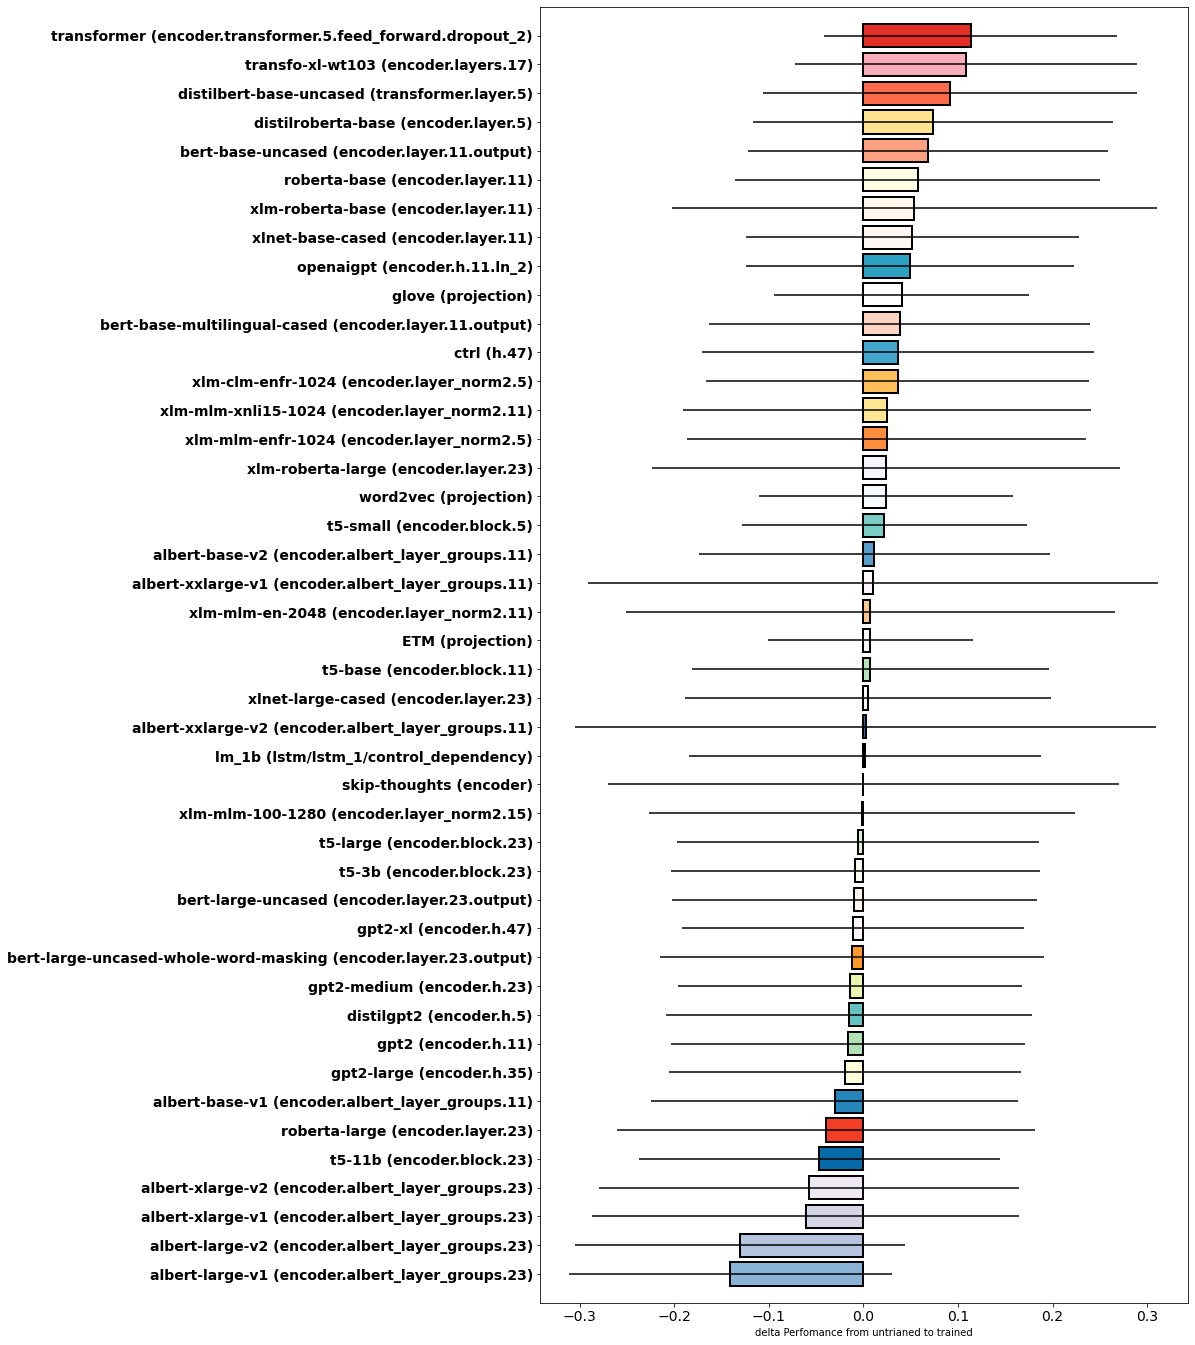

In [54]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
perf_diff=np.asarray(model_perf)[:,0]-np.asarray(model_perf_untrained)[:,0]
new_order=np.argsort(perf_diff)
ax.barh(y_pos, perf_diff[new_order], xerr=np.asarray(model_perf)[new_order,1], align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
model_names_order=[model_names[x] for x in new_order]
ax.set_yticks(y_pos)

ax.set_xlabel('delta Perfomance from untrianed to trained')

ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.set_yticklabels(model_names_order,fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


Text(0.5, 0.98, 'Futrell2018')

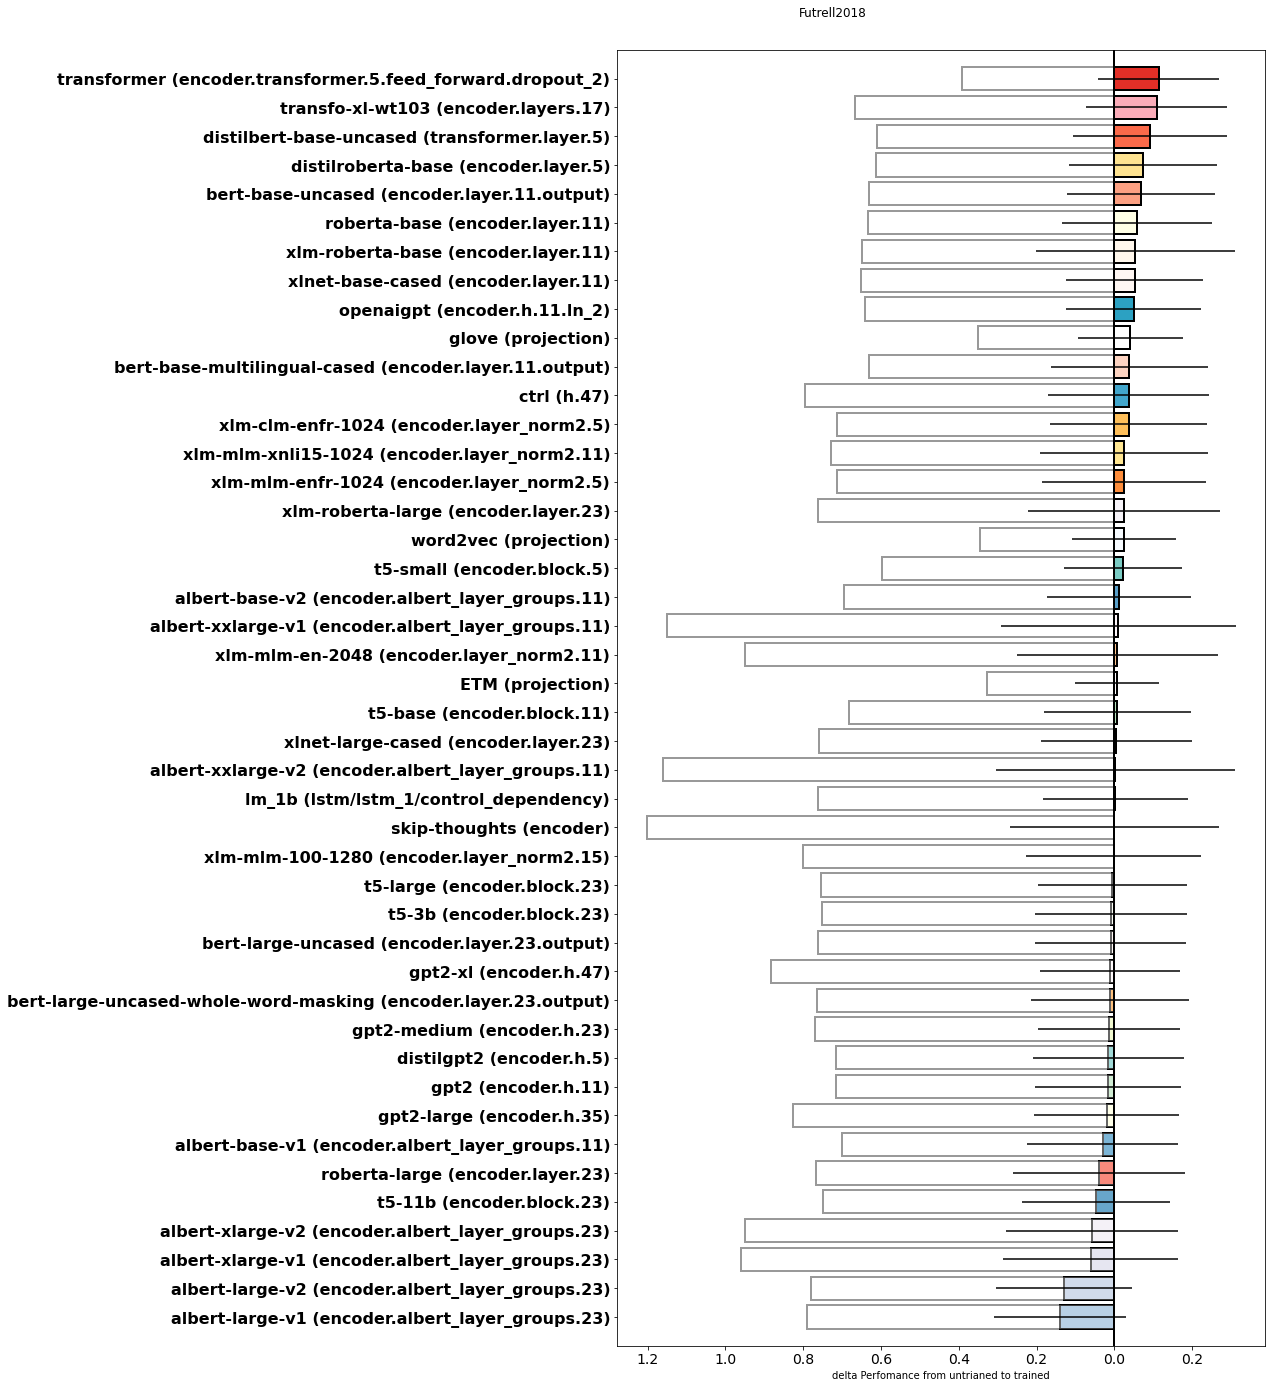

In [60]:
y_pos = np.arange(len(model_names))
fig=plt.figure(figsize=(15,20))
ax = fig.add_axes((.3,.05,.6,.9))
perf_diff=np.asarray(model_perf)[:,0]-np.asarray(model_perf_untrained)[:,0]
new_order=np.argsort(perf_diff)
baseline_perf=np.asarray(model_perf_untrained)[:,0]
ax.barh(y_pos, perf_diff[new_order], xerr=np.asarray(model_perf)[new_order,1],align='center',color=np.asarray(all_colors)[new_order,:],edgecolor=(0,0,0),linewidth=2),
ax.barh(y_pos, -1*baseline_perf[new_order],align='center',color=(1,1,1),edgecolor=(0,0,0),linewidth=2,alpha=.4),
ax.set_ylim(y_pos.min()-1,y_pos.max()+1)
ax.plot([0,0],[y_pos.min()-1,y_pos.max()+1],'k-',linewidth=2)

model_names_order=[model_names[x] for x in new_order]
ax.set_yticks(y_pos)
labels = ["{0:.1f}".format(x) for x in np.abs(ax.get_xticks())]
ax.set_xticklabels(labels)
ax.set_xlabel('delta Perfomance from untrianed to trained')


ax.set_yticklabels(model_names_order,fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.suptitle('Futrell2018',fontsize=12)

## pca analysis 

In [19]:
activation_list=[]
var_explained=[]
loadings=[]
components=[]
pca_type='fixed'
for idx, act_dict in tqdm(enumerate(optim_obj.activations)):
    act=torch.tensor(act_dict['activations'], dtype=float, device=optim_obj.device, requires_grad=False)
    # act must be in m sample * n feature shape ,
    u,s,v=torch.pca_lowrank(act,q=500)
    # keep 85% variance explained ,
    idx_85=torch.cumsum(s**2,dim=0)/torch.sum(s**2)<.85
    cols=list(torch.where(idx_85)[0].cpu().numpy())
    if pca_type=='fixed':
            act_pca = torch.matmul(act, v[:, :300])
    elif pca_type=='equal_var':
            act_pca = torch.matmul(act, v[:, cols])
        
    activation_list.append(act_pca)
    var_explained.append(torch.cumsum(torch.cat((torch.tensor([0],device=optim_obj.device),s**2)),dim=0)/torch.sum(s**2))
    #var_explained.append(torch.cumsum(s**2,dim=0)/torch.sum(s**2))
var_explained=torch.stack(var_explained).cpu()

13it [00:25,  1.97s/it]


/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


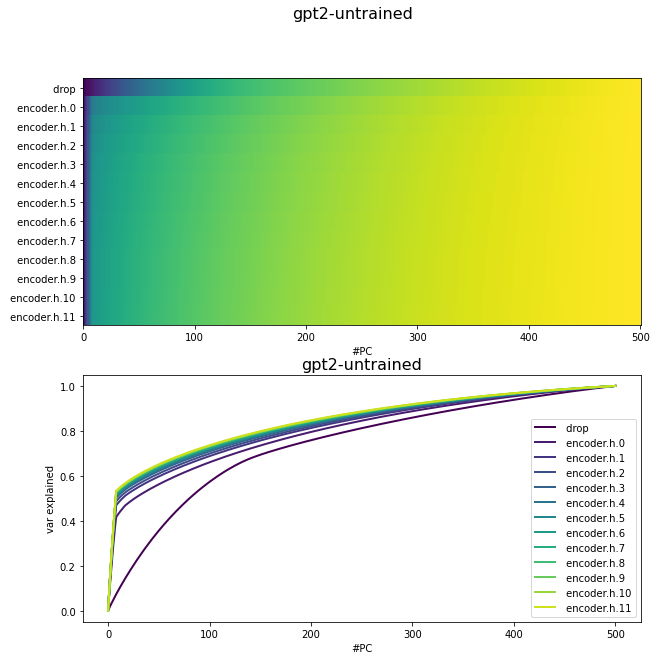

In [20]:
num_colors=len(activation_list)+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))
plt.figure(figsize=(10,10))
plt.suptitle(f"{mdl_name}\n",fontsize=16)
ax=plt.subplot(2,1,1)
ax.imshow(var_explained.cpu().numpy(),aspect='auto',interpolation='none')
ax.set_yticks(np.arange(var_explained.shape[0]))
ax.set_yticklabels([f" {model_layers[idx]}" for idx,x in enumerate(var_explained) ])
ax.set_xlabel('#PC')

ax=plt.subplot(2,1,2)
[ax.plot(x,color=line_cols[idx,:],linewidth=2,label=f" {model_layers[idx]}") for idx,x in enumerate(var_explained)]
ax.legend()
ax.set_xlabel('#PC')
ax.set_ylabel('var explained')
ax.set_title(f"{mdl_name}",fontsize=16)
plt.savefig(os.path.join(ANALYZE_DIR,f"{extractor_id}_layer_var_explained.png"), dpi=None, facecolor='w', edgecolor='w',
               orientation='landscape',transparent=True, bbox_inches=None, pad_inches=0.1,frameon=False)

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


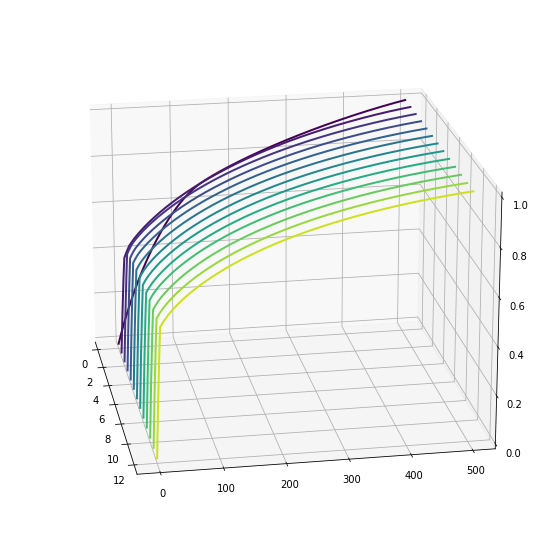

In [21]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1, projection='3d')
[ax.plot((x*0+idx).cpu(),np.arange(x.shape[0]),x,color=line_cols[idx,:],linewidth=2,label=f" {model_layers[idx]}") for idx,x in enumerate(var_explained)]
ax.set_zlim((0,1))
ax.view_init(20, -10)

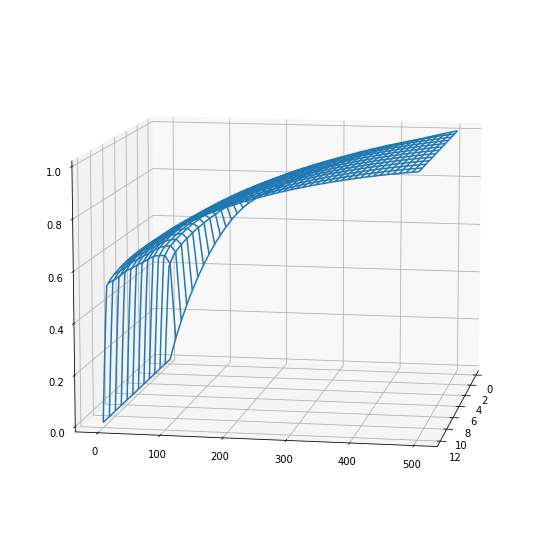

In [22]:
from mpl_toolkits.mplot3d import axes3d
X=torch.stack([(x*0+idx).cpu() for idx,x in enumerate(var_explained)])
Y=np.stack([np.arange(x.shape[0]) for idx,x in enumerate(var_explained)])
Z=torch.stack([x for idx,x in enumerate(var_explained)])


#XX=[[(x*0+idx).cpu(),np.arange(x.shape[0]),x] for idx,x in enumerate(var_explained)]
#XX=[[(x*0+idx).cpu(),np.arange(x.shape[0]),x] for idx,x in enumerate(var_explained)]
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1, projection='3d')
ax.set_zlim((0,1))
ax.view_init(10, 10)
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=10)

In [23]:
act_list_norm=[(X-X.mean(axis=1,keepdim=True)) for X in activation_list]
act_list_norm=[torch.nn.functional.normalize(X) for X in act_list_norm]

In [24]:
num_iter=5
total_sent=activation_list[0].shape[0]
num_samples=100
layer_dist=[]
for idx in tqdm_notebook(range(len(activation_list))):
    pair_dist=[]
    for idy in tqdm_notebook(range(len(activation_list)),position=1):
        sample_dist=[]
        for sample_iter in range(num_iter):
            samples=np.random.choice(total_sent,100,replace=False)
            X=act_list_norm[idx][samples,:]
            Y=act_list_norm[idy][samples,:]
            XY_corr=torch.tensor(1,device=X.device,dtype = float,requires_grad=False)-torch.mm(X,torch.transpose(Y,1,0))
            sample_dist.append(torch.diag(XY_corr))
        pair_dist.append(torch.mean(torch.stack(sample_dist),axis=1))
    layer_dist.append(pair_dist)
    print("Done!")

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/13 [00:00<?, ?it/s]

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


  0%|          | 0/13 [00:00<?, ?it/s]

Done!


Text(0, 0.5, 'score')

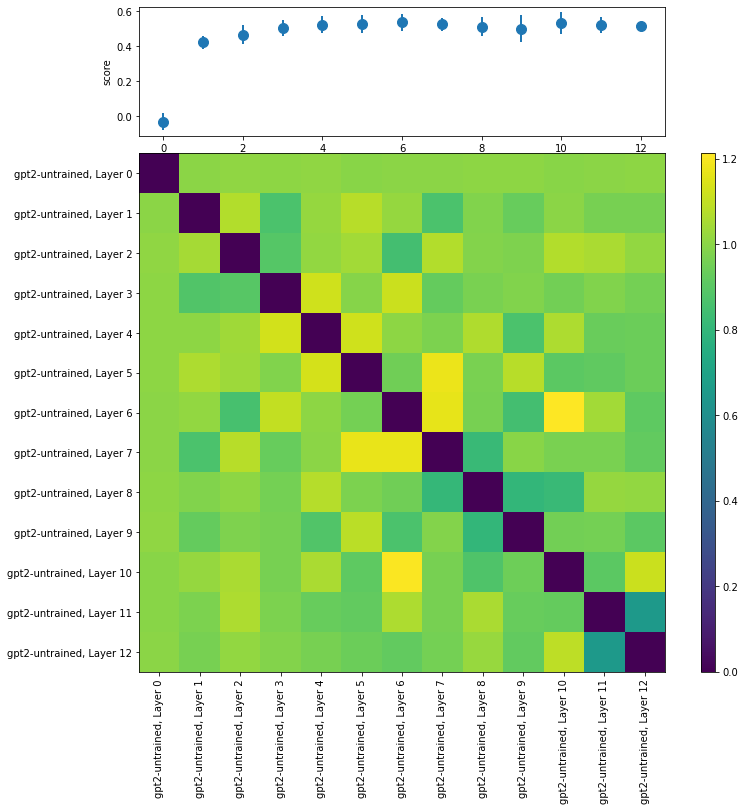

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(10,12))
ax = fig.add_axes((.2,.1,.8,.6))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=.2, pad=0.5,)
im = ax.imshow(torch.stack([torch.stack([x.mean() for x in y]) for y in layer_dist]).cpu(),aspect='auto',interpolation='none')
ax.set_yticks(np.arange(var_explained.shape[0]))
ax.set_xticks(np.arange(var_explained.shape[0]))
ax.set_yticklabels([f"{optim_obj.activations[idx]['model_name']}, Layer {optim_obj.activations[idx]['layer']}" for idx,x in enumerate(var_explained) ])
ax.set_xticklabels([f"{optim_obj.activations[idx]['model_name']}, Layer {optim_obj.activations[idx]['layer']}" for idx,x in enumerate(var_explained) ],rotation=90)

cbar = fig.colorbar(im, cax=cax)
ax = fig.add_axes((.2,.72,.73,.15))
ax.errorbar(np.arange(len(layer_id_list)),score_score[layer_id_list],yerr=score_error[layer_id_list],markersize=10,marker='o',linewidth=0,elinewidth=2,label=f'score {score_benchmark[0]}')
ax.set_ylabel('score')
#plt.savefig(os.path.join(ANALYZE_DIR,f\{name}_layerwise_corr_dist_vs_score.png\), dpi=None, facecolor='w', edgecolor='w',
#            orientation='landscape',,
#            transparent=True, bbox_inches=None, pad_inches=0.1,,
#            frameon=False)

# schematic of pair comaprisons 

In [26]:
num_samples=50
total_sent=activation_list[0].shape[0]
pair_list_norm=[act_list_norm[1],act_list_norm[3]]
XY_corr_list = [torch.tensor(1, device=X.device, dtype=float) - torch.mm(X, torch.transpose(X, 1, 0)) for X in
                            pair_list_norm]
samples=torch.tensor(np.random.choice(total_sent,num_samples,replace=False), dtype = torch.long, device = act_list_norm[0].device)
XY_corr_sample=[X[samples,:] for X in XY_corr_list]
XY_corr_sample=[X[:,samples] for X in XY_corr_sample]
#pairs = torch.combinations(samples, with_replacement=False)
#XY_corr_sample = [XY_corr[pairs[:, 0], pairs[:, 1]] for XY_corr in XY_corr_list]
#XY_corr_sample_tensor = torch.stack(XY_corr_sample)
#XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
#if XY_corr_sample_tensor.shape[1] < XY_corr_sample_tensor.shape[0]:
#    XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
#assert (XY_corr_sample_tensor.shape[1] > XY_corr_sample_tensor.shape[0])
#d_mat = pt_create_corr_rdm_short(XY_corr_sample_tensor, device=samples.device)
                #n1 = d_mat.shape[1],
                #correction = n1 * n1 / (n1 * (n1 - 1) / 2),
                #d_val = correction * d_mat.mean(dim=(0, 1)),
#d_val = d_mat[0,1]

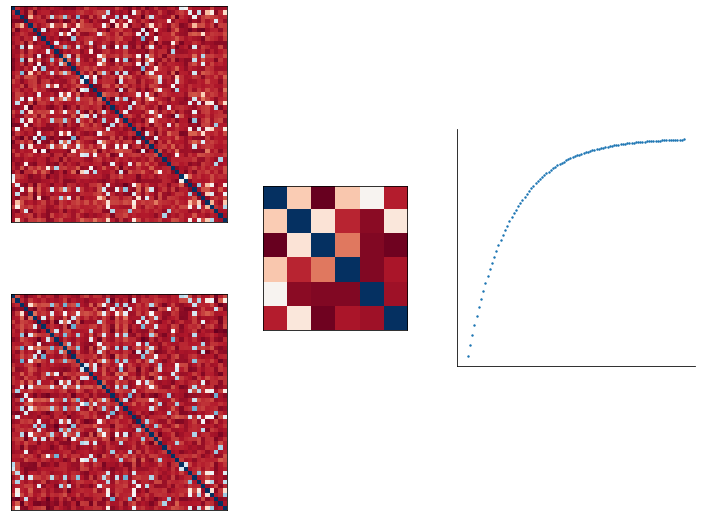

In [27]:
fig=plt.figure(figsize=(10,10))
#plt.suptitle(f"{mdl_name}\n",fontsize=16)
ax=fig.add_axes([.05,.5,.3,.3])
ax.imshow(XY_corr_sample[0].cpu().numpy(),aspect='auto',interpolation='none',cmap=plt.get_cmap('RdBu_r'))
ax.set_xticks([])
ax.set_yticks([])


ax=fig.add_axes([.05,.1,.3,.3])
ax.imshow(XY_corr_sample[1].cpu().numpy(),aspect='auto',interpolation='none',cmap=plt.get_cmap('RdBu_r'))
ax.set_xticks([])
ax.set_yticks([])



mixing=np.random.uniform(low=1,high=2,size=(6,6))
mixing=np.multiply(mixing,(1-np.eye(6)))
mixing=np.triu(mixing)
mixing=mixing+np.transpose(mixing)

ax1=fig.add_axes([.4,.35,.2,.2])
ax1.imshow(mixing,aspect='auto',interpolation='none',cmap=plt.get_cmap('RdBu_r'))
ax1.set_xticks([])
ax1.set_yticks([])



ax1=fig.add_axes([.67,.3,.33,.33])
time=np.linspace(0,1,100)
ax1.scatter(time,1-np.exp(-time*5),2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.show()





In [28]:
num_iter=20
total_sent=activation_list[0].shape[0]
num_samples=100
layer_dist=[]
for idx in tqdm_notebook(range(len(activation_list))):
    pair_dist=[]
    for idy in tqdm_notebook(range(len(activation_list)),position=1):
        sample_dist=[]
        pair_list_norm=[act_list_norm[idx],act_list_norm[idy]]
        XY_corr_list = [torch.tensor(1, device=X.device, dtype=float) - torch.mm(X, torch.transpose(X, 1, 0)) for X in
                            pair_list_norm]
        for sample_iter in range(num_iter):
            samples=torch.tensor(np.random.choice(total_sent,num_samples,replace=False), dtype = torch.long, device = act_list_norm[0].device)
            pairs = torch.combinations(samples, with_replacement=False)
            XY_corr_sample = [XY_corr[pairs[:, 0], pairs[:, 1]] for XY_corr in XY_corr_list]
            XY_corr_sample_tensor = torch.stack(XY_corr_sample)
            XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
            if XY_corr_sample_tensor.shape[1] < XY_corr_sample_tensor.shape[0]:
                XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
            assert (XY_corr_sample_tensor.shape[1] > XY_corr_sample_tensor.shape[0])
            d_mat = pt_create_corr_rdm_short(XY_corr_sample_tensor, device=samples.device)
                #n1 = d_mat.shape[1],
                #correction = n1 * n1 / (n1 * (n1 - 1) / 2),
                #d_val = correction * d_mat.mean(dim=(0, 1)),
            d_val = d_mat[0,1]
            sample_dist.append(d_val)
        pair_dist.append(torch.stack(sample_dist))
    layer_dist.append(pair_dist)
print("Done!")

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/13 [00:00<?, ?it/s]

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Done!


In [29]:
#pereira_settings=extract_pool[extractor_id]
pereira_settings=extract_pool['group=best_performing_pereira_1-dataset=ud_sentences-activation-bench=None-ave=False']()

try :
    model_loc = pereira_settings.model_spec.index(mdl_name)
    pereira_layer_id=pereira_settings.layer_spec[model_loc]
except ValueError as e:
    pereira_layer_id=np.argmax(score_score)

In [30]:
Pereira_dist=torch.mean(torch.stack(layer_dist[pereira_layer_id]),dim=1)
dist_val,dist_idx=torch.sort(Pereira_dist)
assert(dist_idx[0]==pereira_layer_id)
cuts=np.linspace(dist_val.cpu().numpy().min(),dist_val.cpu().numpy().max(),4,endpoint=False)

/om/user/ehoseini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


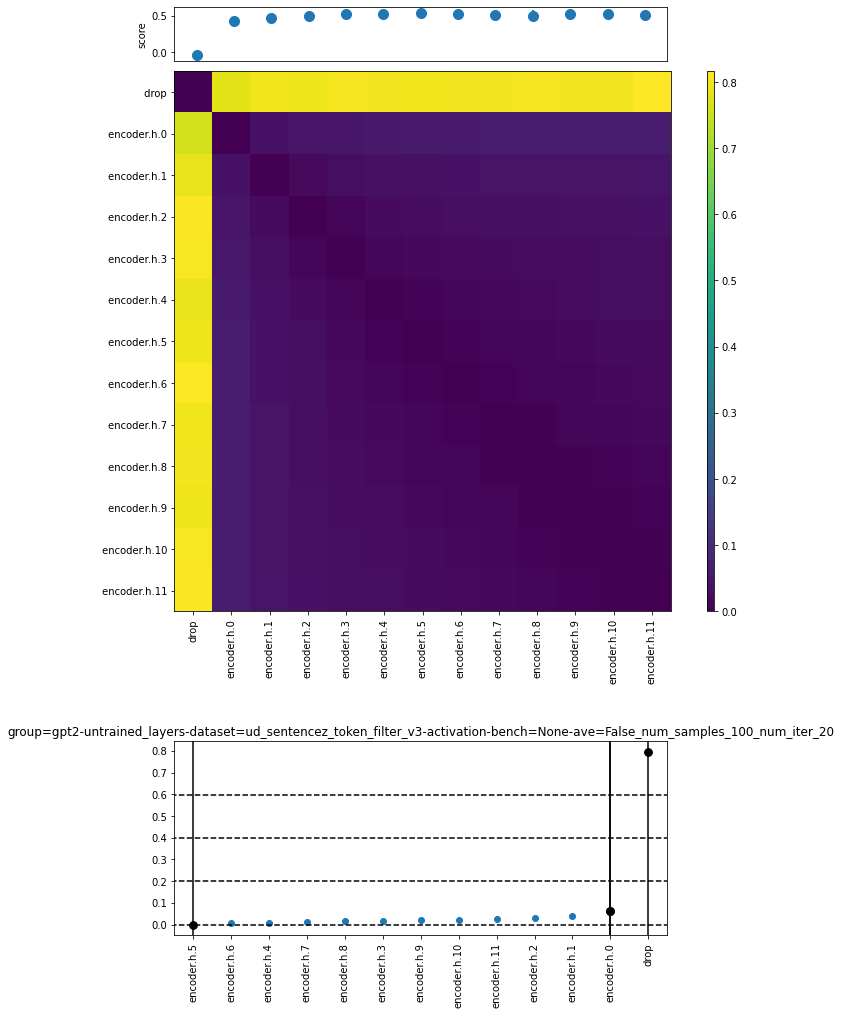

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(10,15))
ax = fig.add_axes((.1,.4,.5*1.5,.5))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=.1, pad=0.5)
im = ax.imshow(torch.stack([torch.stack([x.mean() for x in y]) for y in layer_dist]).cpu(),aspect='auto',interpolation='none')
ax.set_yticks(np.arange(var_explained.shape[0]))
ax.set_xticks(np.arange(var_explained.shape[0]))
ax.set_yticklabels([f" {model_layers[idx]}" for idx,x in enumerate(var_explained) ])
ax.set_xticklabels([f"{model_layers[idx]}" for idx,x in enumerate(var_explained) ],rotation=90)

cbar = fig.colorbar(im, cax=cax)
ax = fig.add_axes((.1,.91,.5*1.37,.05))
ax.errorbar(np.arange(len(layer_id_list)),score_score[layer_id_list],yerr=score_error[layer_id_list],markersize=10,marker='o',linewidth=0,elinewidth=2,label=f'score {score_benchmark[0]}')
ax.set_ylabel('score')
ax.set_xticks([])

ax = fig.add_axes((.1,.1,.5*1.37,.18))
ax.set_title(f"{extractor_id}_num_samples_{num_samples}_num_iter_{num_iter}")
ax.scatter(np.arange(dist_val.cpu().shape[0]),dist_val.cpu())
ax.set_xlim((-1,dist_val.cpu().shape[0]+1))
ax.set_ylim((0-.05,np.max(dist_val.cpu().numpy())+.05))
[ax.plot(plt.xlim(),[x,x],'k--') for x in cuts],
closest_points=[np.argmin(np.abs(dist_val.cpu()-x)) for x in cuts]
[ax.scatter(x.cpu().numpy(),dist_val[int(x.cpu().numpy())].cpu().numpy(),60,color=(0,0,0)) for x in closest_points]
ax.set_xticks(tuple(np.arange(dist_val.cpu().shape[0])))
    #ax.set_xticklabels(dist_idx.cpu().numpy()),
ax.set_xticklabels([model_layers[int(x)] for x in dist_idx.cpu().numpy()],rotation=90)
[ax.plot([x.cpu().numpy(),x.cpu().numpy()],plt.ylim(),'k-') for x in closest_points]
ax.set_xlim((0-.5,len(dist_idx)-.5))
plt.savefig(os.path.join(ANALYZE_DIR,f"{extractor_id}_num_samples_{num_samples}_num_iter_{num_iter}_layerwise_similiarty_dist_vs_score.png"), dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait',transparent=True, bbox_inches=None, pad_inches=0.1,frameon=False)  

[]